# Assignment  No:01

Implement the Edge Aware smoothing Algorithm. Read the steps and implement in the code section below:


**Step 1:**
Load the necessary imports


In [1]:
%matplotlib inline 
import cv2
from matplotlib import pyplot as plt 
from matplotlib import gridspec
import numpy as np

**Step 2:** 
Load the image using the opencv


(413, 372, 3)


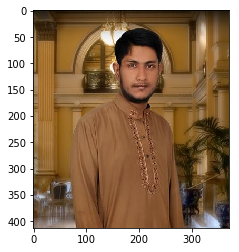

In [39]:
img=cv2.cvtColor(cv2.imread('img01.jpg'), cv2.COLOR_BGR2RGB) 

plt.imshow(img)
print(img.shape)

**Step 3:** 
Apply the smoothing operator over the image


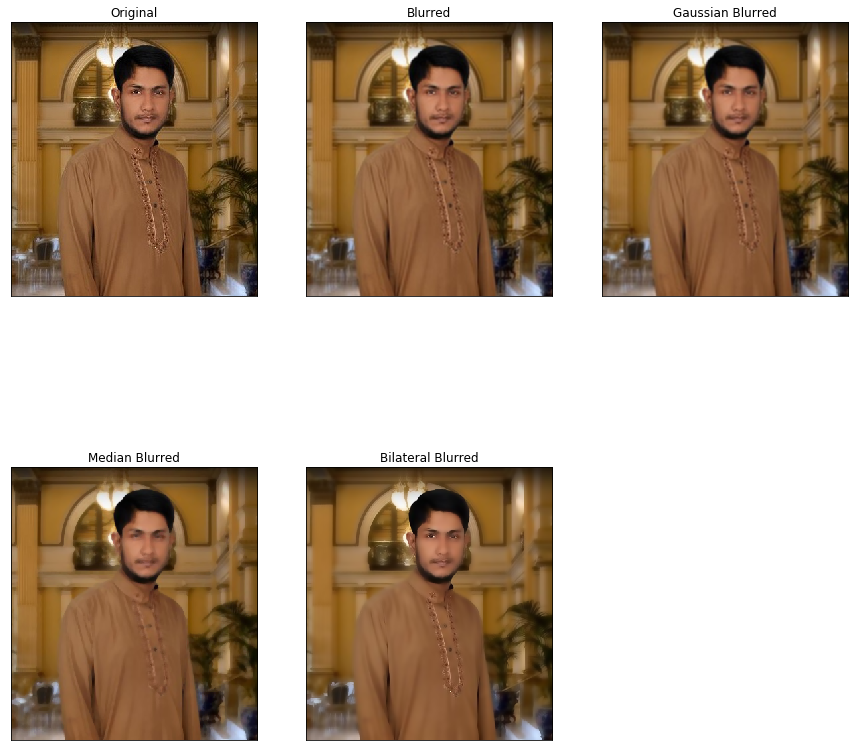

In [40]:
blur = cv2.blur(img,(3,3))
gBlur = cv2.GaussianBlur(img,(5,5),0)
median = cv2.medianBlur(img,5)
bilateralblur = cv2.bilateralFilter(img,9,75,75)

f, axs = plt.subplots(figsize=(15,15))

plt.subplot(231),plt.imshow(img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(232),plt.imshow(blur),plt.title('Blurred'),plt.xticks([]), plt.yticks([])
plt.subplot(233),plt.imshow(gBlur),plt.title('Gaussian Blurred'),plt.xticks([]), plt.yticks([])
plt.subplot(234),plt.imshow(median),plt.title('Median Blurred'),plt.xticks([]), plt.yticks([])
plt.subplot(235),plt.imshow(bilateralblur),plt.title('Bilateral Blurred'),plt.xticks([]), plt.yticks([])

plt.savefig('result-smoothing.jpg')
plt.show()



# # generate some data
# x = np.arange(0, 10, 0.2)
# y = np.sin(x)

# # plot it
# fig = plt.figure(figsize=(8, 6)) 
# gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1]) 
# ax0 = plt.subplot(gs[0])
# ax0.plot(x, y)
# ax1 = plt.subplot(gs[1])
# ax1.plot(y, x)

# plt.tight_layout()
# plt.savefig('grid_figure.pdf')

**Step 4:** 
Apply the gradient operation using the operators learned in the class to detect the edges


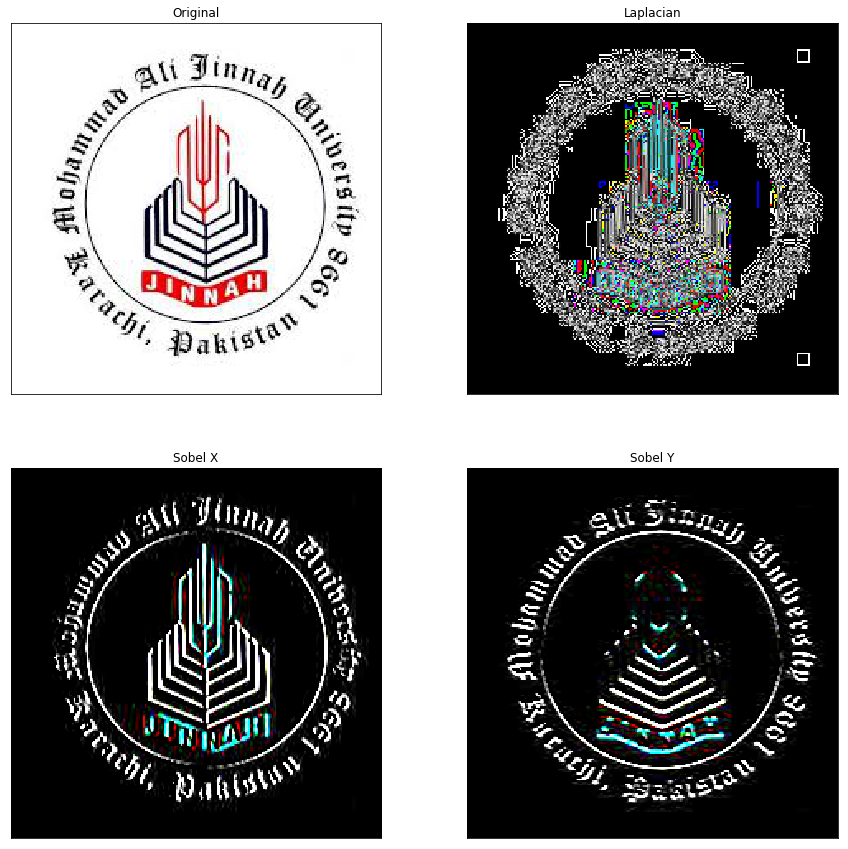

In [45]:
img = cv2.cvtColor(cv2.imread('Maju.jpg'), cv2.COLOR_BGR2RGB) 

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)

plt.figure(figsize = (15,15))

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray'),plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray'),plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray'),plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray'),plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

**Step 5:**
Loop over the smoothed image to identify the edge pixels and replace those with the none smoothed pixels.

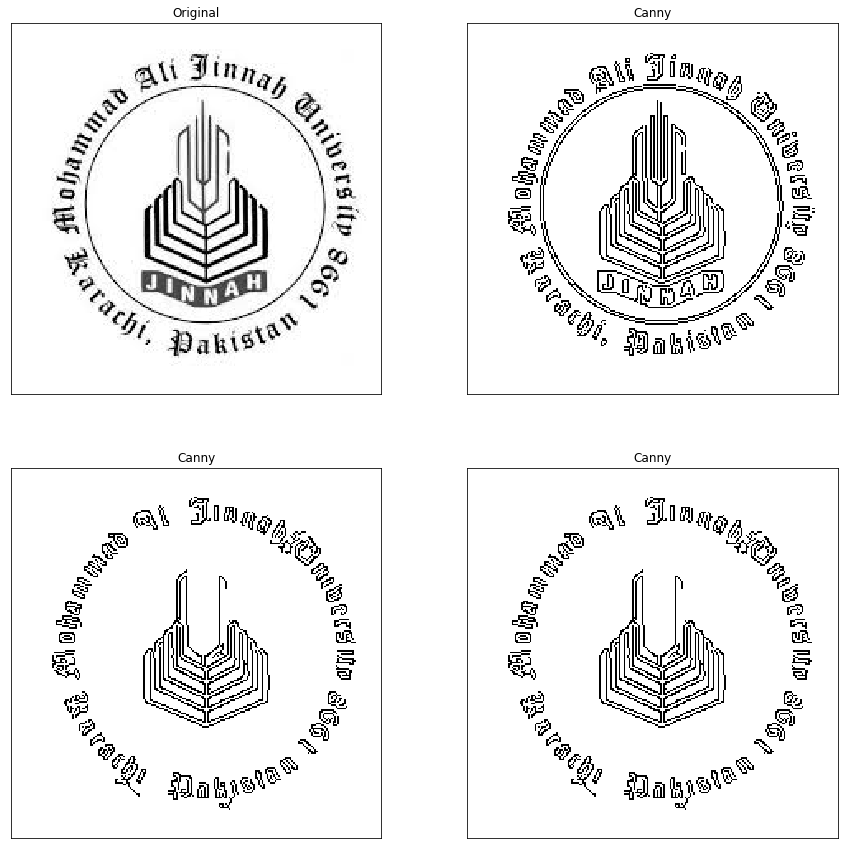

In [46]:
img = cv2.imread('Maju.jpg',0)
cannyXY = 256-cv2.Canny(img,200,200)
cannyXXY = 256-cv2.Canny(img,1300,0)
cannyXYY = 256-cv2.Canny(img,0,1300)

plt.figure(figsize = (15,15))

plt.subplot(221),plt.imshow(img, cmap='gray'),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(cannyXY, cmap='gray'),plt.title('Canny'),plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(cannyXXY, cmap='gray'),plt.title('Canny'),plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(cannyXYY, cmap='gray'),plt.title('Canny'),plt.xticks([]), plt.yticks([])

plt.show()

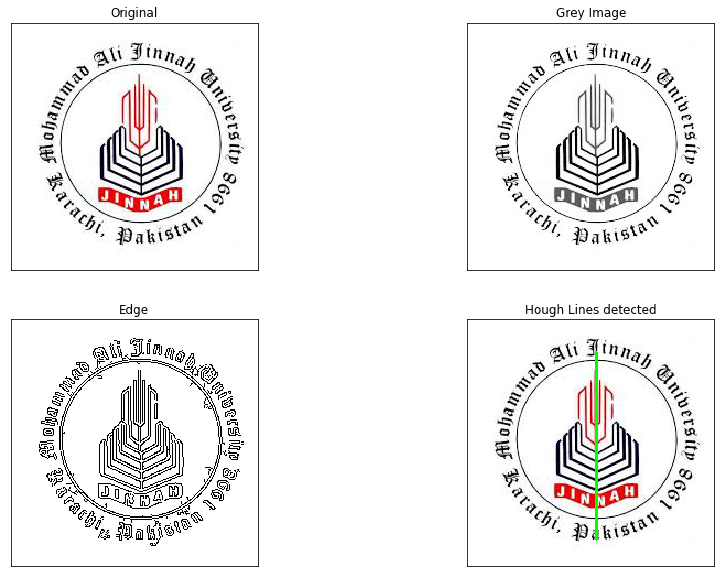

In [47]:
img = cv2.cvtColor(cv2.imread('Maju.jpg'), cv2.COLOR_BGR2RGB)
gray = 255-cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray,20,250,apertureSize = 3)
dst = np.copy(img)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=80,maxLineGap=10)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(dst,(x1,y1),(x2,y2),(0,255,0),2)

plt.figure(figsize = (15,10))
plt.subplot(221),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(gray, cmap='Greys'),plt.title('Grey Image')
plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(edges, cmap='Greys'),plt.title('Edge')
plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(dst),plt.title('Hough Lines detected')
plt.xticks([]), plt.yticks([])

plt.show()

**Step 6:**
Display the Results on multiple images.

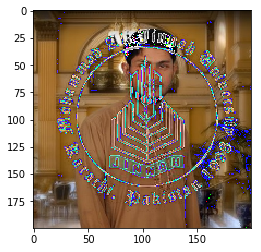

In [55]:
img1=cv2.resize(cv2.cvtColor(cv2.imread('img01.jpg'), cv2.COLOR_BGR2RGB), (200,200))
img2=cv2.resize(cv2.cvtColor(cv2.imread('Maju.jpg'), cv2.COLOR_BGR2RGB), (200,200))
img3=img1+img2

plt.imshow(img3)

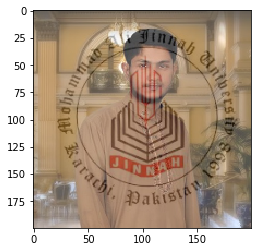

In [49]:
dst = cv2.addWeighted(img1,0.7,img2,0.3,0)
plt.imshow(dst)

(413, 372, 3)
(225, 225, 3)


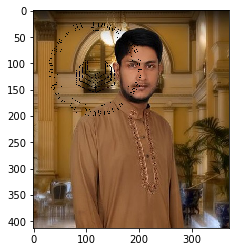

In [57]:
# LoadC two images
img1 = cv2.cvtColor(cv2.imread('img01.jpg'), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('Maju.jpg'), cv2.COLOR_BGR2RGB)

print(img1.shape)
print(img2.shape)

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst
plt.imshow(img1)